In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

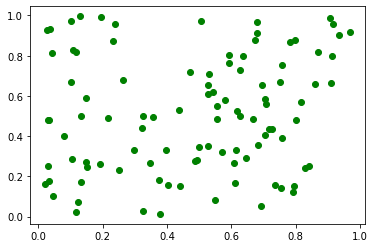

In [13]:
X = np.random.rand(100)
Y = np.random.rand(100)

villes = np.transpose([X,Y])
plt.scatter(X,Y, color = 'green')

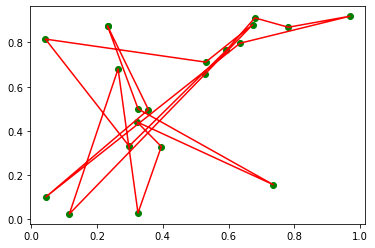

8.639436528496814

In [14]:
"""Un chemin est une boucle qui passe par tous les points une fois. 
On le code par la liste des indices des villes dans l'ordre de passage du chemin"""

def longueur(villes, chemin):
    long = 0
    for i,j in zip(chemin[:-1], chemin[1:]):
        long += ((villes[i][0]-villes[j][0])**2 + (villes[i][1]-villes[j][1])**2) **(1/2)
    i, j = chemin[-1],chemin[0]
    long += ((villes[i][0]-villes[j][0])**2 + (villes[i][1]-villes[j][1])**2) **(1/2)
    return long

def tracer(villes, chemin):
    x = [villes[chemin[i]][0] for i in range(-1,len(chemin))]
    y = [villes[chemin[i]][1] for i in range(-1,len(chemin))]
    plt.plot(x, y, color='r')
    plt.scatter(x, y, color = 'g')
    plt.show()
    return
L=[i for i in range(20)]
np.random.shuffle(L)
tracer(villes, L)
longueur(villes, L)

In [15]:
class Colonie():
    """ Optimisateur du problème du voyageur de commerce utilisant la méthode d'optimisation de la colonie de fourmis"""
    def __init__(self,villes):
        self.villes = villes
        n = len(villes)
        self.n = n
        self.temps = 0
        self.performances = []
        self.meilleur = None
        self.pref = np.ones((n,n))/n
        self.distances = np.array([[((villes[i][0]-villes[j][0])**2 + (villes[i][1]-villes[j][1])**2) **(1/2) for j in range(n)] for i in range(n)])
                                 
    def fourmi(self,dstpwr,prefpwr):
        n = self.n
        i = np.random.randint(n)
        chemin =[i]
        inconnus = [k for k in range(n) if k != i]
        for _ in range(n-1):
            p = (1/self.distances[inconnus, i]**dstpwr) * (self.pref[inconnus, i]**prefpwr)
            if np.max(p) == 0:
                p=np.ones(len(p))
            while np.max(p) <0.1:
                p *= 10
            p /= np.sum(p)
            i = np.random.choice(inconnus, p=p)
            chemin.append(i)
            inconnus.remove(i)
        return chemin
    
    def evaluer(self,chemin):
        villes = self.villes
        long = 0
        for i,j in zip(chemin[:-1], chemin[1:]):
            long += self.distances[i,j]
        i, j = chemin[-1],chemin[0]
        long += self.distances[i,j]
        return long
    
    def tracer_chemin(self, chemin):
        villes= self.villes
        x = [villes[chemin[i]][0] for i in range(-1,len(chemin))]
        y = [villes[chemin[i]][1] for i in range(-1,len(chemin))]
        fig = plt.figure(figsize = (5,5))
        plt.xlim((-0.1,1.1))
        plt.ylim((-0.1,1.1))
        plt.plot(x, y, color='r')
        plt.scatter(x, y, color = 'g')
        plt.axis('off')
        plt.title(f"Meilleur chemin (L={self.evaluer(chemin):.3f})")
        plt.show()
        return
    
    def step(self,nbr_fourmis, dstpwr, prefpwr, evaporation =.3):
        chemins = [self.fourmi(dstpwr,prefpwr) for k in range(nbr_fourmis)]
        M = np.zeros((self.n,self.n))
        scores = np.array([self.evaluer(chemin) for chemin in chemins])
        self.performances.append(np.max(scores))
        scores /= np.sum(scores)
        for k in range(nbr_fourmis):
            chemin = chemins[k]
            for i,j in zip(chemin[:-1], chemin[1:]):
                M[i,j] += scores[k]
                M[j,i] += scores[k]
            M[chemin[-1],chemin[0]] += scores[k]
            M[chemin[0],chemin[-1]] += scores[k]
        self.pref = self.pref *evaporation + M
        self.pref /= np.max(self.pref)
        self.meilleur = chemins[np.argmax(scores)]
        self.temps += 1

    def run(self, nbr_fourmis, dstpwr, prefpwr, it=500, evaporation=.3):
        for _ in tqdm(range(it)):
            self.step(nbr_fourmis, dstpwr, prefpwr, evaporation)
    
    def evolution(self,n=None):
        if n == None: 
            n = self.temps
        X = np.linspace(0,1,n)
        plt.plot(X,self.performances[self.temps - n:])
        plt.show()

    def plot(self):
        x = [self.villes[i][0] for i in range(self.n)]
        y = [self.villes[i][1] for i in range(self.n)]
        fig = plt.figure(figsize= (10,5))
        plt.subplot(121)
        plt.axis('off')
        plt.xlim((-0.1,1.1))
        plt.ylim((-0.1,1.1))
        m = np.max(self.pref)
        for i in range(self.n):
            for j in range(i):
                plt.plot([x[i],x[j]], [y[i],y[j]], color= (1, 1-self.pref[i,j]/m, 1-self.pref[i,j]/m,0.9), zorder = self.pref[i,j]/m)
        plt.scatter(x,y,zorder = 2)
        plt.show()
        return
    
    

In [16]:
villes = np.load("100 villes.npy")
colonie = Colonie(villes)

In [17]:
colonie.run(10,3,3,10000)

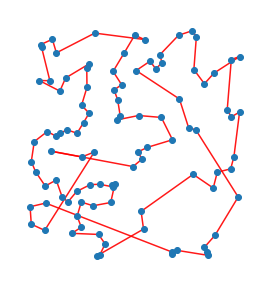

In [18]:
colonie.plot()

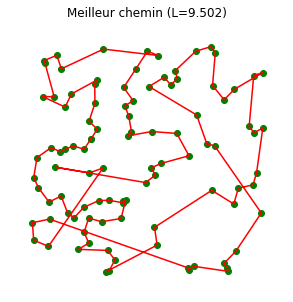

In [19]:
colonie.tracer_chemin(colonie.meilleur)

In [20]:
villes = np.load("30 villes.npy")
colonie = Colonie(villes)

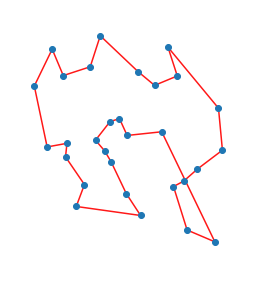

In [21]:
colonie.run(5,3,1,10000)
colonie.plot()

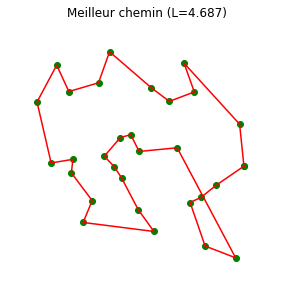

In [22]:
colonie.tracer_chemin(colonie.meilleur)
